In [1]:
import netCDF4
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.pyplot as plt
import numpy as np
import netCDF4
import numpy as np
from osgeo import gdal,osr,ogr
import matplotlib.pyplot as plt
import gdal
import rasterio

In [2]:
data=xr.open_dataset('/mnt/e/wrf_tibet/test/tibet/wrfinput2')


In [3]:
data['LU_INDEX'][0].shape

(171, 231)

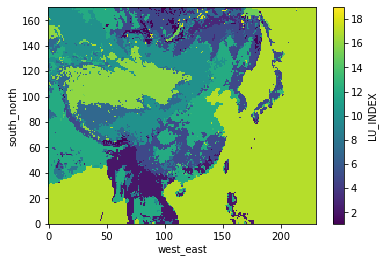

In [4]:
data['LU_INDEX'][0].plot()

In [5]:
tib = rasterio.open('/mnt/e/wrf_tibet/raw_data/map/tibet_PolygonToRaster1.tif')
tibet=tib.read(1)

In [6]:
rol=np.flipud(tibet)

/home/qin/anaconda3/envs/gis3/lib/python3.8/site-packages/matplotlib/contour.py:1209: RuntimeWarning: overflow encountered in add
  self.layers = 0.5 * (self._levels[:-1] + self._levels[1:])


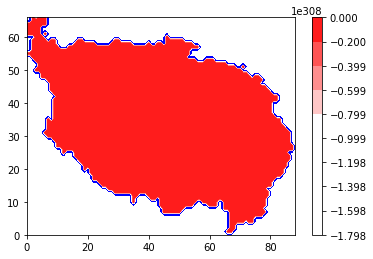

In [7]:
cmap = 'bwr' 
vmin = tibet.min()
vmax = tibet.max()
v2=np.linspace(vmin, vmax,10,endpoint=True)
cf = plt.contourf(rol,v2,cmap=cmap)
plt.colorbar(cf)
#plt.title('evi summer climatology')
plt.show()

In [8]:
rol.shape

(67, 89)

In [9]:
xds=rioxarray.open_rasterio('/mnt/e/wrf_tibet/test/tibet/lu.tif')

NameError: name 'rioxarray' is not defined

In [ ]:
xds

In [ ]:
import geopandas as gpd

In [ ]:
tibet_shp=gpd.read_file('/mnt/e/wrf_tibet/raw_data/map/tibet.shp')
tibet_shp

In [ ]:
type(tibet_shp)

In [ ]:
from gdal import ogr2ogr

In [ ]:
gdal_rasterize -burn 1 -of netcdf -ts 288 192 -te 0 -90 360 90 -at tibet.shp

In [ ]:
import rioxarray
import geopandas

geodf = geopandas.read_file('/mnt/e/wrf_tibet/raw_data/map/tibet.shp')
xds = xr.open_dataset('/mnt/e/US/data/background/adaptor.mars.internal-1596375176.1815774-3472-9-2aa07f29-ebb2-40d5-96ee-6f092afc9cce.nc')


In [ ]:
clipped = xds.rio.clip(geodf.geometry.apply(mapping), geodf.crs)